In [1]:
import numpy as np
from matplotlib import pyplot as plt

from data import SubstanceData
from processor import ProcessorData

In [2]:
ID = "C75694" # ID вашего вещества
SUBSTANCE_NAME = "Trichlorofluoromethane (R11)" # Название вашего вещества

In [3]:
substance_data = SubstanceData(ID)

# Линия насыщения

In [42]:
# Нижние, верхние границы температур и шаг для линии насыщения
# Данные указываются в градусах Цельсия (°C)
TLow_saturation = -110
THigh_saturation = 190
TInc_saturation = 1 # Шаг изменения температуры

In [5]:
response_saturation = substance_data.get_saturation_data(TLow_saturation, THigh_saturation, TInc_saturation)

Получение данных о линии насыщения...
Данные получены успешно


In [6]:
S_saturation, H_saturation = ProcessorData.process_saturation_data(response_saturation)

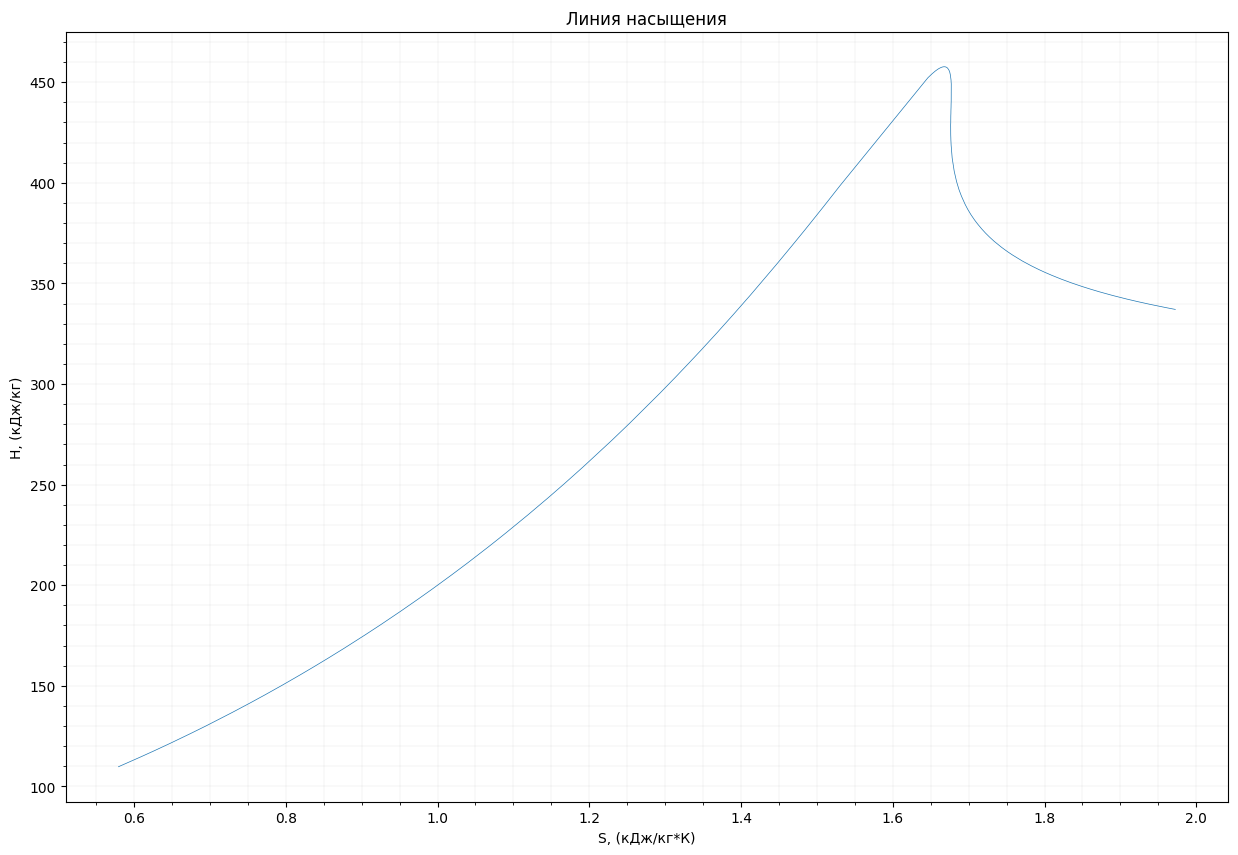

In [7]:
plt.subplots(figsize=(15, 10))
plt.plot(S_saturation, H_saturation, linewidth=0.5)
plt.ylabel("H, (кДж/кг)")
plt.xlabel("S, (кДж/кг*К)")
plt.title("Линия насыщения")
plt.grid(True, which='both', linewidth=0.1)
plt.minorticks_on() 
plt.show()

# Изотермы

In [8]:
# Данные указываются в градусах Цельсия (°C)
THigh_isothermal = 350
TLow_isothermal = -100
N_isothermal = 10 # Количество изотерм для построения

T_isothermal_array = np.linspace(TLow_isothermal, THigh_isothermal, N_isothermal + 1) # можно написать свой массив
print("Температуры для построения изотерм:\n")
print(T_isothermal_array)


PLow_isothermal = 0.1 # Нижние и верхние границы давлений для изотерм
PHigh_isothermal = 100
PInc_isothermal = 1 # Шаг давлений для изотерм

Температуры для построения изотерм:

[-100.  -55.  -10.   35.   80.  125.  170.  215.  260.  305.  350.]


In [9]:
response_isothermal = [substance_data.get_isothermal_data(T, PLow_isothermal, PHigh_isothermal, PInc_isothermal) for T in T_isothermal_array]

Получение данных о изотерме -100.0°C...
Данные получены успешно
Получение данных о изотерме -55.0°C...
Данные получены успешно
Получение данных о изотерме -10.0°C...
Данные получены успешно
Получение данных о изотерме 35.0°C...
Данные получены успешно
Получение данных о изотерме 80.0°C...
Данные получены успешно
Получение данных о изотерме 125.0°C...
Данные получены успешно
Получение данных о изотерме 170.0°C...
Данные получены успешно
Получение данных о изотерме 215.0°C...
Данные получены успешно
Получение данных о изотерме 260.0°C...
Данные получены успешно
Получение данных о изотерме 305.0°C...
Данные получены успешно
Получение данных о изотерме 350.0°C...
Данные получены успешно


In [10]:
T_isothermal, H_isothermal, S_isothermal = [], [], [] 

for response in response_isothermal:
    T, H, S = ProcessorData.process_isothermal_data(response)
    T_isothermal.append(T)
    H_isothermal.append(H)
    S_isothermal.append(S)

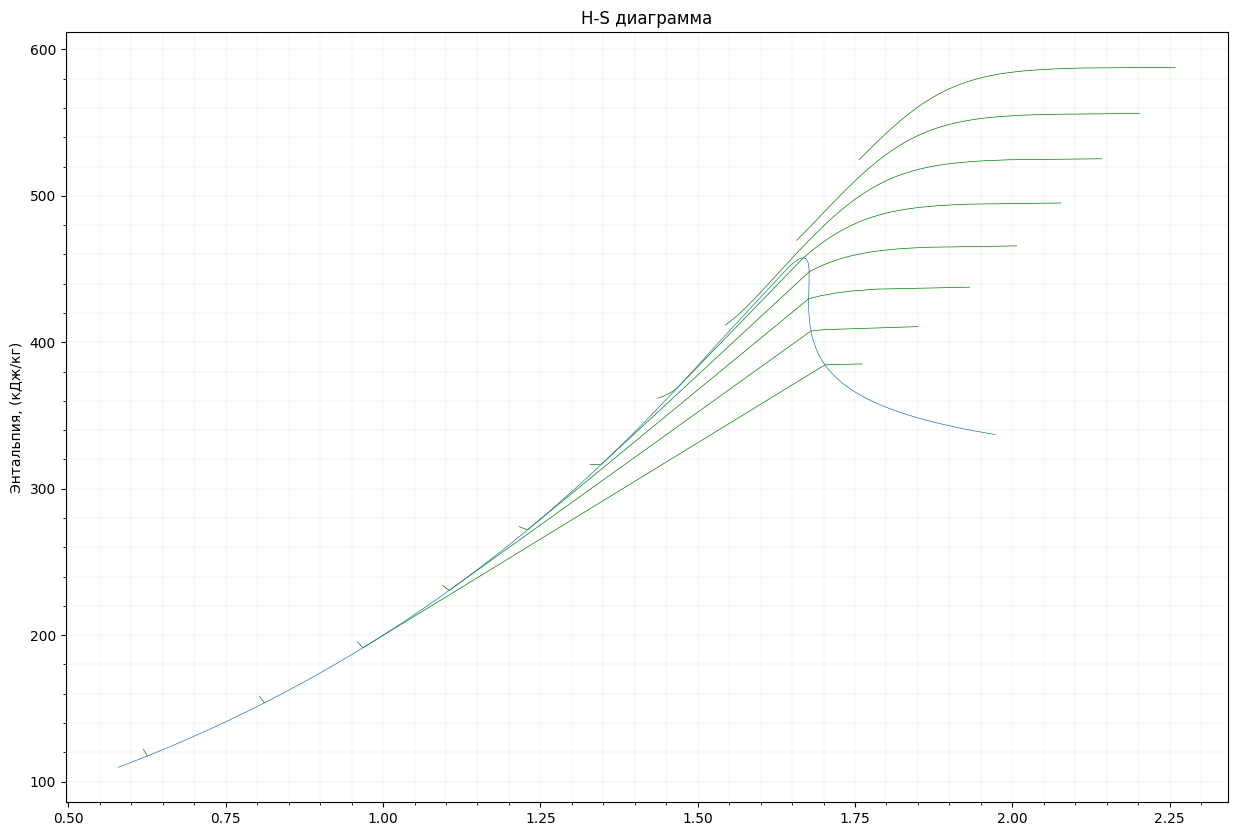

In [11]:
plt.subplots(figsize=(15, 10))
for i in range(N_isothermal): # Изотермы
    plt.plot(S_isothermal[i], H_isothermal[i], color='g', linewidth=0.5)
plt.plot(S_saturation, H_saturation, linewidth=0.5)
plt.ylabel("Энтальпия, (кДж/кг)")
plt.title(f"H-S диаграмма")
plt.grid(True, which='both', linewidth=0.1)
plt.minorticks_on() 
plt.show()

# Изобары

In [12]:
# Данные указываются в барах
PHigh_isobaric = 300
PLow_isobaric = 0.01
N_isobaric = 10 # Количество избар для построения

P_isobaric_array = np.linspace(PLow_isobaric, PHigh_isobaric, N_isobaric + 1) # можно написать свой массив
print("Давления для построения изобар:\n")
print(P_isobaric_array)

TLow_isobaric = -100 # Нижние и верхние границы температур для изобар
THigh_isobaric = 350
TInc_isobaric = 1 # Шаг температуры для изобра

Давления для построения изобар:

[1.00000e-02 3.00090e+01 6.00080e+01 9.00070e+01 1.20006e+02 1.50005e+02
 1.80004e+02 2.10003e+02 2.40002e+02 2.70001e+02 3.00000e+02]


In [13]:
response_isobaric = [substance_data.get_isobaric_data(P, TLow_isobaric, THigh_isobaric, TInc_isobaric) for P in P_isobaric_array]

Получение данных о изобаре 0.01 бар...
Данные получены успешно
Получение данных о изобаре 30.009000000000004 бар...
Данные получены успешно
Получение данных о изобаре 60.008 бар...
Данные получены успешно
Получение данных о изобаре 90.00700000000002 бар...
Данные получены успешно
Получение данных о изобаре 120.00600000000001 бар...
Данные получены успешно
Получение данных о изобаре 150.005 бар...
Данные получены успешно
Получение данных о изобаре 180.00400000000002 бар...
Данные получены успешно
Получение данных о изобаре 210.00300000000001 бар...
Данные получены успешно
Получение данных о изобаре 240.002 бар...
Данные получены успешно
Получение данных о изобаре 270.00100000000003 бар...
Данные получены успешно
Получение данных о изобаре 300.0 бар...
Данные получены успешно


In [14]:
P_isobaric, H_isobaric, S_isobaric = [], [], [] 

for response in response_isobaric:
    P, H, S = ProcessorData.process_isobaric_data(response)
    P_isobaric.append(P)
    H_isobaric.append(H)
    S_isobaric.append(S)

# H-S диаграмма

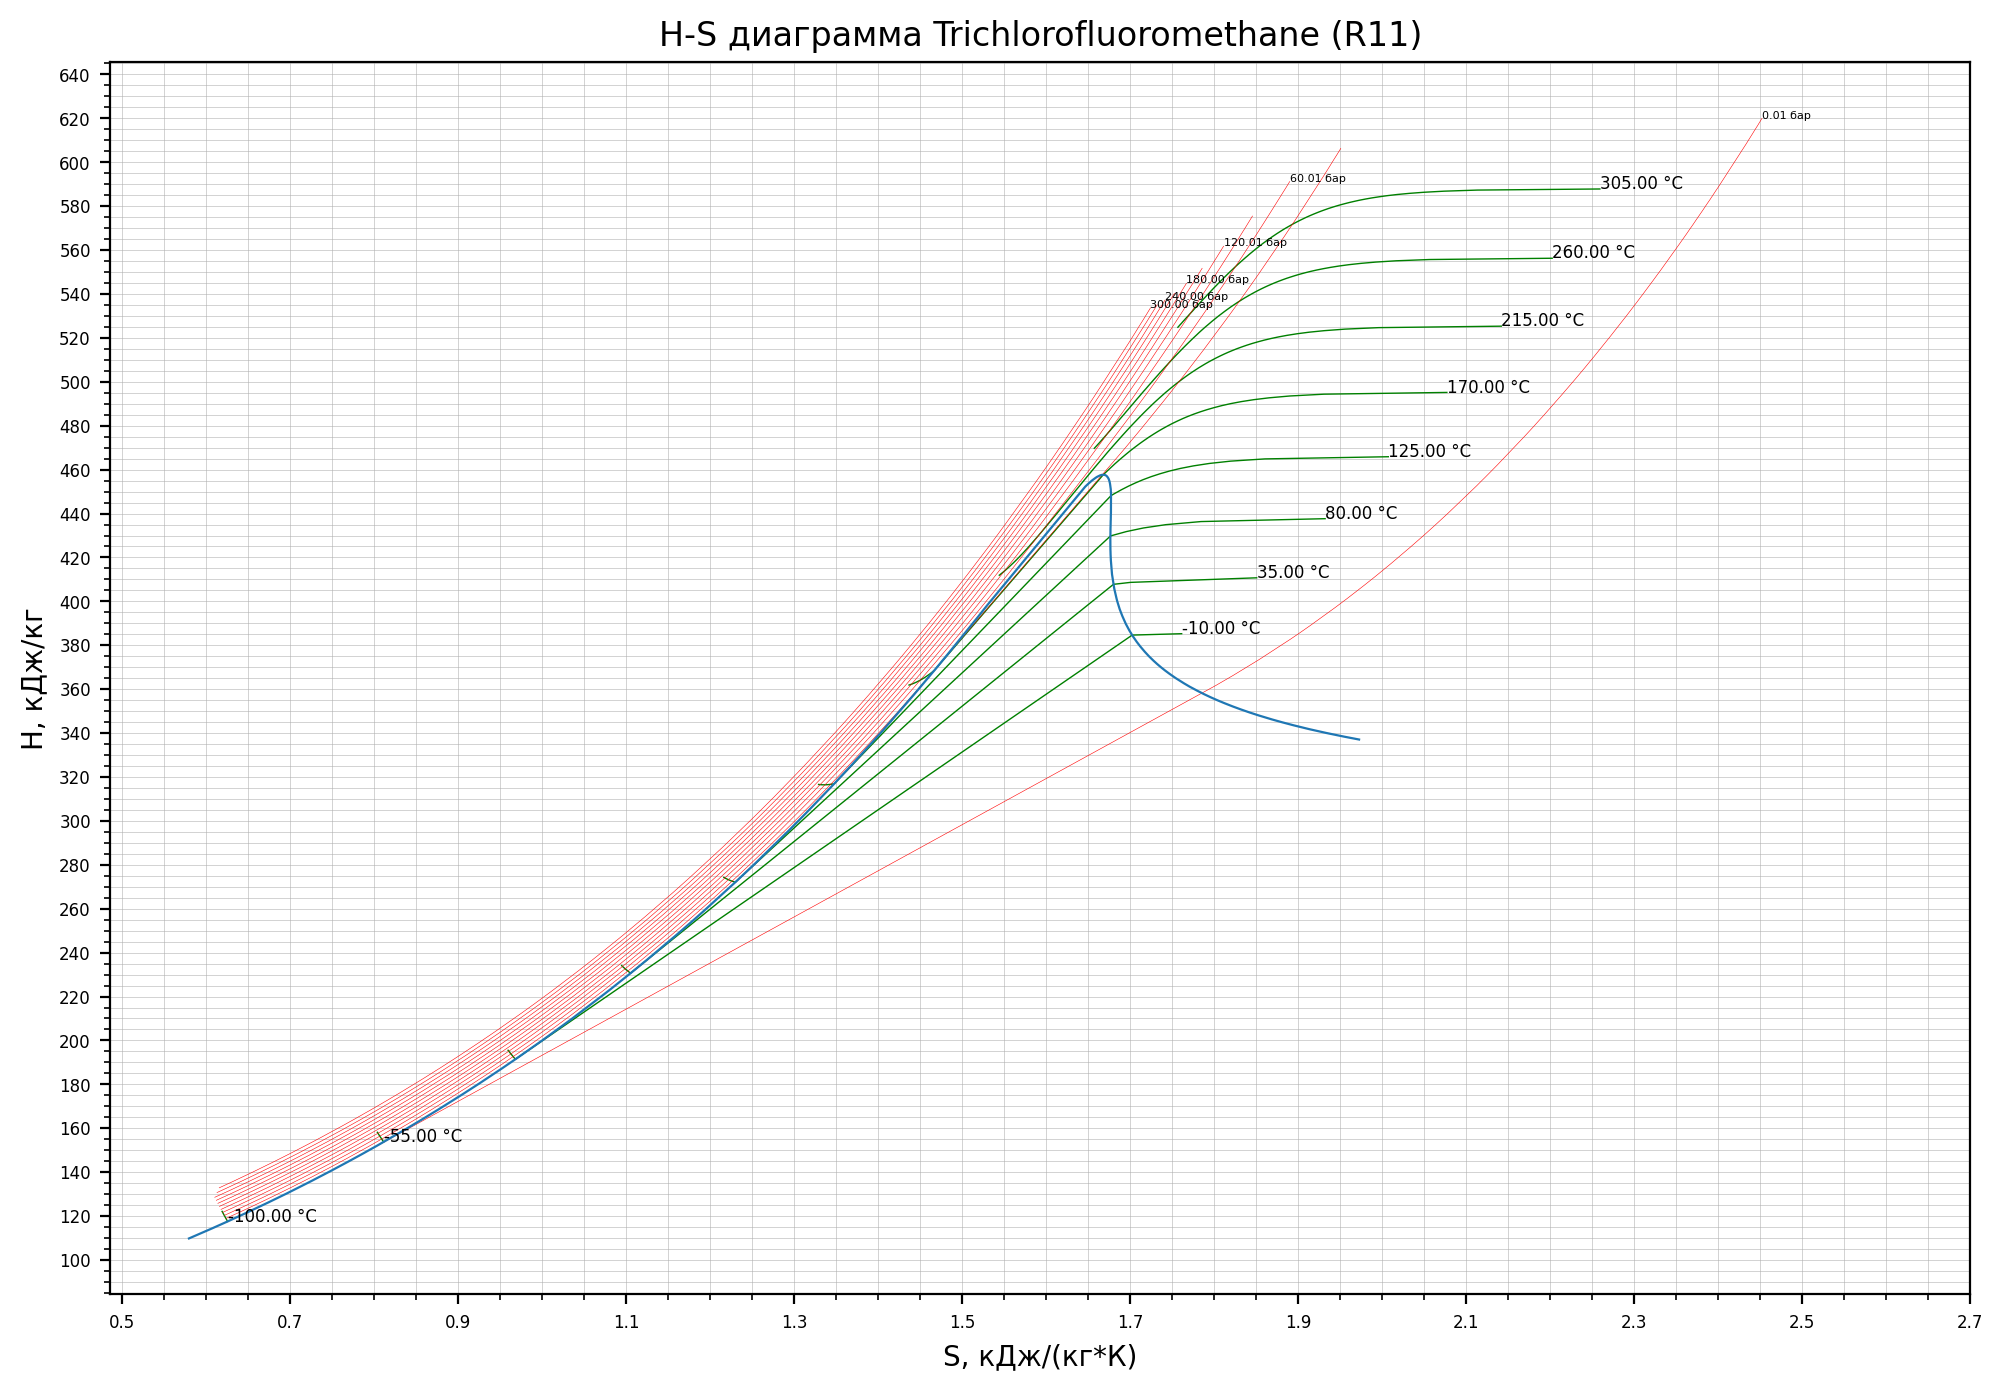

In [15]:
plt.subplots(figsize=(12, 8), dpi=200)

# Изотермы
for i in range(N_isothermal):
    plt.plot(S_isothermal[i], H_isothermal[i], color='g', linewidth=0.5)
    plt.text(
        S_isothermal[i][0], 
        H_isothermal[i][0], 
        f"{T_isothermal[i][0]:.2f} °C", 
        fontsize=6, 
        color='black', 
        bbox=dict(facecolor='none', alpha=0.3, edgecolor='none')
    )

# Изобары
for i in range(len(P_isobaric)):
    plt.plot(S_isobaric[i], H_isobaric[i], color='r', linewidth=0.2)
    if i % 2 == 0:
        plt.text(
            S_isobaric[i][-1], 
            H_isobaric[i][-1], 
            f"{P_isobaric[i][0]:.2f} бар", 
            fontsize=4, 
            color='black', 
            bbox=dict(facecolor='none', alpha=0.3, edgecolor='none')
        )

# Линия насыщения
plt.plot(S_saturation, H_saturation, linewidth=0.8)

plt.ylabel("H, кДж/кг")
plt.xlabel("S, кДж/(кг*К)")
plt.title(f"H-S диаграмма {SUBSTANCE_NAME}")

# Необходиммо установить границы для оси X и Y
x_ticks = np.arange(0.5, 2.8,  step=0.2)  
y_ticks = np.arange(100, 660, step=20) 

plt.xticks(x_ticks, fontsize=6)
plt.yticks(y_ticks, fontsize=6)
plt.grid(True, which='both', linewidth=0.2)  
plt.minorticks_on()  

plt.show()
